In [1]:
#データの形を変形
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

#イオン名と原子番号紐づけ(トリチウムはまだ含まず)
ion_dir={101:"h",301:"t", 102:"he", 103:"li", 104:"be", 106:"c", 107:"n", 108:"o", 110:"ne", 114:"si",}
ion_lis=["h","t","he","li","be","c","n","o","ne","si"]
num_lis=[1., 1., 2., 3., 4., 6., 7., 8., 10., 14.]
mas_lis=[1.008, 3.016, 4.003, 6.941, 9.012, 12.01, 14.01, 16.00, 20.18, 28.09 ]
df_lis=[]
for i in ion_lis:
    file=('plt96_%s_mod.dat' %i)

    f=open(file)
    line=f.readline()
    line=line[6:]
    dens=int(line[:2])   #密度
    ev=int(line[3:5])   #電子温度
    coff=int(line[6:])   #係数の数

    df=pd.read_csv(file,header=1,delim_whitespace=True)
    df_lis.append(df)

In [2]:
ndf_lis=[]
adf=pd.DataFrame()
for df in df_lis:
    ndf=pd.DataFrame()
    for i in df.columns[2:]:
        df1=pd.DataFrame({'density':df['dens'],
                     'cofficient':df['coff'],
                    'tempureture':float(i),
                    'R-Power':df[i]})
        ndf=pd.concat([ndf,df1])
    ndf_lis.append(ndf)
    adf=pd.concat([adf,ndf])

for i in range(len(num_lis)):
    ndf_lis[i]['number']=num_lis[i]
    ndf_lis[i]['mass']=mas_lis[i]

adf=pd.concat(ndf_lis)
       
        
        

In [3]:
adf

,density,cofficient,tempureture,R-Power,number,mass
0,7.699,1,-0.6990,-47.1967,1.0,1.008
1,8.000,1,-0.6990,-47.1967,1.0,1.008
2,8.301,1,-0.6990,-47.1967,1.0,1.008
3,8.699,1,-0.6990,-47.1967,1.0,1.008
4,9.000,1,-0.6990,-47.1967,1.0,1.008
...,...,...,...,...,...,...
331,16.000,10,4.1761,-25.4095,14.0,28.090
332,16.000,11,4.1761,-25.4457,14.0,28.090
333,16.000,12,4.1761,-25.7410,14.0,28.090
334,16.000,13,4.1761,-25.9382,14.0,28.090


In [4]:
from pycaret.regression import *

In [5]:
clf = setup(data = adf, target = 'R-Power',train_size=0.7)

 
Setup Succesfully Completed.


,Description,Value
0,session_id,6168
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(38832, 6)"
4,Missing Values,False
5,Numeric Features,4
6,Categorical Features,1
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [ ]:
compare_models()

IntProgress(value=0, description='Processing: ', max=251)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,10:27:45
Status,. . . . . . . . . . . . . . . . . .,Fitting Fold 3 of 10
Estimator,. . . . . . . . . . . . . . . . . .,Support Vector Machine
ETC,. . . . . . . . . . . . . . . . . .,5.0 Minutes Remaining


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
0,Linear Regression,7.2581,104.2879,10.2107,0.4084,0.2540,-0.2144,0.0324
1,Ridge Regression,7.2578,104.2878,10.2106,0.4084,0.2539,-0.2144,0.0282
2,Least Angle Regression,7.2581,104.2879,10.2107,0.4084,0.2540,-0.2144,0.0325
3,Bayesian Ridge,7.2576,104.2880,10.2107,0.4084,0.2538,-0.2143,0.0440
4,Random Sample Consensus,7.2293,114.4563,10.6934,0.3511,0.2563,-0.2069,1.9505
5,TheilSen Regressor,6.3258,128.3565,11.3249,0.2729,0.2434,-0.1607,18.8220
6,Orthogonal Matching Pursuit,7.6443,131.6093,11.4690,0.2541,0.2593,-0.2144,0.0243
7,Lasso Regression,7.3889,132.0907,11.4896,0.2515,0.2550,-0.2035,0.0318
8,Elastic Net,7.1314,133.6853,11.5584,0.2425,0.2524,-0.1922,0.0316
9,Huber Regressor,5.4296,153.0033,12.3636,0.1335,0.2555,-0.1130,1.3467


In [11]:
clf = setup(data = adf, target = 'density',train_size=0.7)

 
Setup Succesfully Completed.


,Description,Value
0,session_id,5257
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(38832, 6)"
4,Missing Values,False
5,Numeric Features,4
6,Categorical Features,1
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [12]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
0,Extra Trees Regressor,0.9956,2.3719,1.5399,0.6118,0.1327,0.0935,2.6804
1,Random Forest,1.1750,2.6577,1.6300,0.5649,0.1392,0.1086,5.1600
2,Decision Tree,1.2222,3.3305,1.8244,0.4549,0.1557,0.1130,0.2579
3,K Neighbors Regressor,1.4613,3.5617,1.8871,0.4169,0.1600,0.1338,0.2334
4,Extreme Gradient Boosting,1.7529,4.4787,2.1161,0.2669,0.1795,0.1660,1.9961
5,CatBoost Regressor,1.8734,4.9680,2.2287,0.1868,0.1891,0.1780,8.0832
6,Light Gradient Boosting Machine,1.9183,5.1426,2.2676,0.1583,0.1924,0.1825,0.3243
7,Gradient Boosting Regressor,2.0244,5.5708,2.3601,0.0882,0.1994,0.1921,2.4307
8,AdaBoost Regressor,2.0790,5.8111,2.4105,0.0488,0.2032,0.1970,0.6845
9,Ridge Regression,2.1005,5.9794,2.4452,0.0214,0.2071,0.2003,0.0191


ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=5257, verbose=0, warm_start=False)

In [13]:
import yellowbrick

In [14]:
from yellowbrick.features import Rank2D

In [15]:
X = adf.drop("density",axis=1)
y=adf["density"]

In [16]:
visualizer = Rank2D(algorithm="pearson")

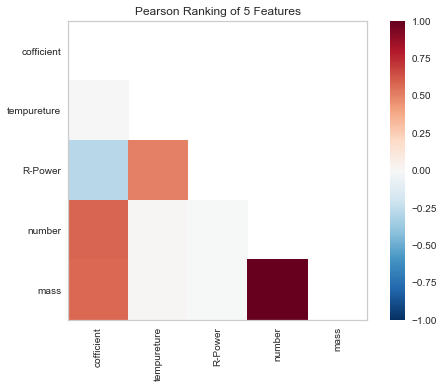

<AxesSubplot:title={'center':'Pearson Ranking of 5 Features'}>

In [17]:
visualizer.fit_transform(X, y)
visualizer.show()

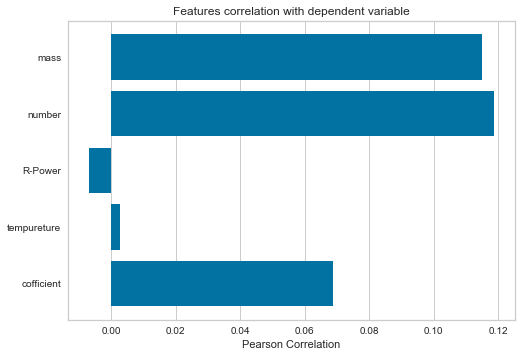

<AxesSubplot:title={'center':'Features correlation with dependent variable'}, xlabel='Pearson Correlation'>

In [18]:
from yellowbrick.target import FeatureCorrelation
visualizer = FeatureCorrelation(labels=X.columns)
visualizer.fit(X, y) 
visualizer.show()  

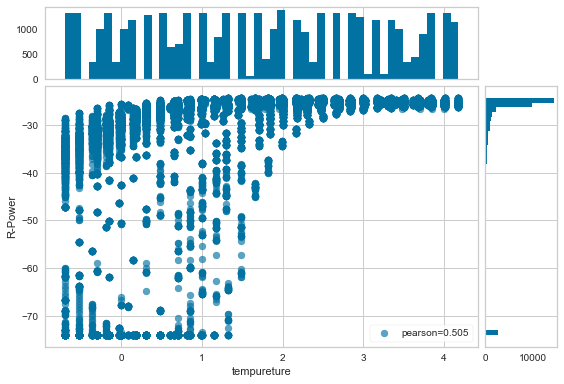

<AxesSubplot:xlabel='tempureture', ylabel='R-Power'>

In [21]:
from yellowbrick.features import JointPlotVisualizer

visualizer = JointPlotVisualizer(columns=['tempureture', 'R-Power'])
visualizer.fit_transform(X, y)
visualizer.show()

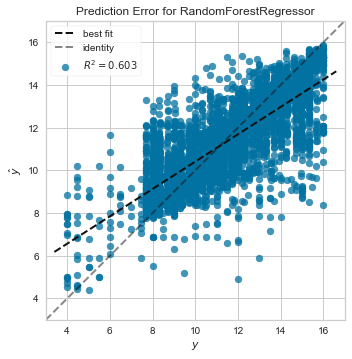

<AxesSubplot:title={'center':'Prediction Error for RandomForestRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [22]:
from sklearn.ensemble import RandomForestRegressor as RFR
model = RFR()
from yellowbrick.regressor import PredictionError, ResidualsPlot
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)


visualizer = PredictionError(model)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()